In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import qiskit_aer
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeVigo
from qiskit import transpile

from qiskit_draw_utils import getCircuitLayout
from match_circuit import matchCircuitLayouts

from circuit_data_prep import prepareData

In [2]:
qc_a = QuantumCircuit(4, 4)
qc_a.ccx(0, 1, 3)
# qc_a.iswap(0, 1)
qc_a.measure([0, 1, 2, 3], [0, 1, 2, 3])

optimization_level = 1
backend = qiskit_aer.AerSimulator.from_backend(FakeVigo())
pm2 = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)

prep = prepareData(qc_a, pm2, backend)

qca_trans = pm2.run(qc_a)

# layer_orig = getCircuitLayout(qc_a)
# layer_trans = getCircuitLayout(qca_trans)

# matchCircuitLayouts(layer_orig, layer_trans, pass_manager=pm2)

>>>
{'matches': [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (9, 0), (10, 0), (11, 0), (12, 0), (16, 0)], 'complete': False, 'un_matches': 6}
---
>>>
{'matches': [(0, 1)], 'complete': True, 'un_matches': 0}
---
>>>
{'matches': [(19, 0)], 'complete': True, 'un_matches': 0}
---
>>>
{'matches': [(20, 0)], 'complete': True, 'un_matches': 0}
---
>>>
{'matches': [(16, 1)], 'complete': True, 'un_matches': 0}
---
CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 1),), clbits=(Clbit(ClassicalRegister(4, 'c'), 1),))
CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[1.5707963267948966]), qubits=(Qubit(QuantumRegister(5, 'q'), 1),), clbits=())
>>>
{'matches': [(17, 1), (18, 0), (18, 0)], 'complete': False, 'un_matches': 18}
---
>>>
{'matches': [(0, 1)], 'complete': True, 'un_matches': 0}
---
>>>
{'matches': [(19, 0)], 'complete': True, 'un_

In [4]:
qca_trans.draw()

global phase: 5π/8
                                                                            »
ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
               ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐»
      q_3 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├»
               └─────────┘└────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘»
      q_1 -> 2 ──────────────────────────────■────────────────┼─────────────»
                                                              │             »
      q_0 -> 3 ───────────────────────────────────────────────■─────────────»
                   ┌─┐                                                      »
      q_2 -> 4 ────┤M├──────────────────────────────────────────────────────»
                   └╥┘                                                      »
          c: 4/═════╩═══════════════════════════════════════════════════════»
                    2                                                       »
«                                                                            »
«ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
«               ┌───┐┌──────────┐┌───┐┌──────────┐┌────┐┌─────────┐┌───┐     »
«      q_3 -> 1 ┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├┤ Rz(π/2) ├┤ X ├──■──»
«               └─┬─┘├─────────┬┘└─┬─┘└──────────┘└────┘└─────────┘└─┬─┘  │  »
«      q_1 -> 2 ──■──┤ Rz(π/4) ├───┼─────────────────────────────────┼────┼──»
«                    └─────────┘   │                                 │  ┌─┴─┐»
«      q_0 -> 3 ───────────────────■─────────────────────────────────■──┤ X ├»
«                                                                       └───┘»
«      q_2 -> 4 ─────────────────────────────────────────────────────────────»
«                                                                            »
«          c: 4/═════════════════════════════════════════════════════════════»
«                                                                            »
«                                                
«ancilla_0 -> 0 ─────────────────────────────────
«               ┌───┐     ┌─────────┐      ┌─┐   
«      q_3 -> 1 ┤ X ├──■──┤ Rz(π/4) ├───■──┤M├───
«               └─┬─┘┌─┴─┐├─────────┴┐┌─┴─┐└╥┘┌─┐
«      q_1 -> 2 ──┼──┤ X ├┤ Rz(-π/4) ├┤ X ├─╫─┤M├
«                 │  └┬─┬┘└──────────┘└───┘ ║ └╥┘
«      q_0 -> 3 ──■───┤M├───────────────────╫──╫─
«                     └╥┘                   ║  ║ 
«      q_2 -> 4 ───────╫────────────────────╫──╫─
«                      ║                    ║  ║ 
«          c: 4/═══════╩════════════════════╩══╩═
«                      3                    0  1

In [3]:
prep.toJSON()

'{"original": {"layers": [{"operations": [{"gate": "ccx", "num_qubits": 3, "num_clbits": 0, "params": [], "qubits": [{"register": {"name": "q", "size": 4}, "index": 0}, {"register": {"name": "q", "size": 4}, "index": 1}, {"register": {"name": "q", "size": 4}, "index": 3}], "clbits": []}], "num_op": 1}, {"operations": [{"gate": "measure", "num_qubits": 1, "num_clbits": 1, "params": [], "qubits": [{"register": {"name": "q", "size": 4}, "index": 2}], "clbits": [{"register": {"name": "q", "size": 4}, "index": 2}]}], "num_op": 1}, {"operations": [{"gate": "measure", "num_qubits": 1, "num_clbits": 1, "params": [], "qubits": [{"register": {"name": "q", "size": 4}, "index": 0}], "clbits": [{"register": {"name": "q", "size": 4}, "index": 0}]}], "num_op": 1}, {"operations": [{"gate": "measure", "num_qubits": 1, "num_clbits": 1, "params": [], "qubits": [{"register": {"name": "q", "size": 4}, "index": 1}], "clbits": [{"register": {"name": "q", "size": 4}, "index": 1}]}], "num_op": 1}, {"operations

In [4]:
qc_a.draw()

┌─┐      
q_0: ──■─────┤M├──────
       │     └╥┘┌─┐   
q_1: ──■──────╫─┤M├───
       │  ┌─┐ ║ └╥┘   
q_2: ──┼──┤M├─╫──╫────
     ┌─┴─┐└╥┘ ║  ║ ┌─┐
q_3: ┤ X ├─╫──╫──╫─┤M├
     └───┘ ║  ║  ║ └╥┘
c: 4/══════╩══╩══╩══╩═
           2  0  1  3

In [3]:
qca_trans.draw()

global phase: 5π/8
                                                                            »
ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
               ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐»
      q_3 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├»
               └─────────┘└────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘»
      q_1 -> 2 ──────────────────────────────■────────────────┼─────────────»
                                                              │             »
      q_0 -> 3 ───────────────────────────────────────────────■─────────────»
                   ┌─┐                                                      »
      q_2 -> 4 ────┤M├──────────────────────────────────────────────────────»
                   └╥┘                                                      »
          c: 4/═════╩═══════════════════════════════════════════════════════»
                    2                                                       »
«                                                                            »
«ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
«               ┌───┐┌──────────┐┌───┐┌──────────┐┌────┐┌─────────┐┌───┐     »
«      q_3 -> 1 ┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├┤ Rz(π/2) ├┤ X ├──■──»
«               └─┬─┘├─────────┬┘└─┬─┘└──────────┘└────┘└─────────┘└─┬─┘  │  »
«      q_1 -> 2 ──■──┤ Rz(π/4) ├───┼─────────────────────────────────┼────┼──»
«                    └─────────┘   │                                 │  ┌─┴─┐»
«      q_0 -> 3 ───────────────────■─────────────────────────────────■──┤ X ├»
«                                                                       └───┘»
«      q_2 -> 4 ─────────────────────────────────────────────────────────────»
«                                                                            »
«          c: 4/═════════════════════════════════════════════════════════════»
«                                                                            »
«                                                
«ancilla_0 -> 0 ─────────────────────────────────
«               ┌───┐     ┌─────────┐      ┌─┐   
«      q_3 -> 1 ┤ X ├──■──┤ Rz(π/4) ├───■──┤M├───
«               └─┬─┘┌─┴─┐├─────────┴┐┌─┴─┐└╥┘┌─┐
«      q_1 -> 2 ──┼──┤ X ├┤ Rz(-π/4) ├┤ X ├─╫─┤M├
«                 │  └┬─┬┘└──────────┘└───┘ ║ └╥┘
«      q_0 -> 3 ──■───┤M├───────────────────╫──╫─
«                     └╥┘                   ║  ║ 
«      q_2 -> 4 ───────╫────────────────────╫──╫─
«                      ║                    ║  ║ 
«          c: 4/═══════╩════════════════════╩══╩═
«                      3                    0  1

In [3]:
qca_trans.draw()

global phase: 5π/8
                                                                            »
ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
               ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐»
      q_3 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├»
               └─────────┘└────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘»
      q_0 -> 2 ──────────────────────────────┼────────────────■─────────────»
                                             │                              »
      q_1 -> 3 ──────────────────────────────■──────────────────────────────»
                   ┌─┐                                                      »
      q_2 -> 4 ────┤M├──────────────────────────────────────────────────────»
                   └╥┘                                                      »
          c: 4/═════╩═══════════════════════════════════════════════════════»
                    2                                                       »
«                                                                            »
«ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
«               ┌───┐┌──────────┐┌───┐┌──────────┐┌────┐┌─────────┐┌───┐     »
«      q_3 -> 1 ┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├┤ Rz(π/2) ├┤ X ├──■──»
«               └─┬─┘└──────────┘└─┬─┘└──────────┘└────┘└─────────┘└─┬─┘  │  »
«      q_0 -> 2 ──┼────────────────■─────────────────────────────────┼────┼──»
«                 │  ┌─────────┐                                     │  ┌─┴─┐»
«      q_1 -> 3 ──■──┤ Rz(π/4) ├─────────────────────────────────────■──┤ X ├»
«                    └─────────┘                                        └───┘»
«      q_2 -> 4 ─────────────────────────────────────────────────────────────»
«                                                                            »
«          c: 4/═════════════════════════════════════════════════════════════»
«                                                                            »
«                                                
«ancilla_0 -> 0 ─────────────────────────────────
«               ┌───┐┌───┐┌──────────┐┌───┐   ┌─┐
«      q_3 -> 1 ┤ X ├┤ X ├┤ Rz(-π/4) ├┤ X ├───┤M├
«               └─┬─┘└─┬─┘├─────────┬┘└─┬─┘┌─┐└╥┘
«      q_0 -> 2 ──┼────■──┤ Rz(π/4) ├───■──┤M├─╫─
«                 │   ┌─┐ └─────────┘      └╥┘ ║ 
«      q_1 -> 3 ──■───┤M├───────────────────╫──╫─
«                     └╥┘                   ║  ║ 
«      q_2 -> 4 ───────╫────────────────────╫──╫─
«                      ║                    ║  ║ 
«          c: 4/═══════╩════════════════════╩══╩═
«                      3                    0  1

In [11]:
from qiskit.circuit.library import SGate, iSwapGate, U1Gate, PauliGate, XGate, U3Gate, UnitaryGate,CPhaseGate, C4XGate
import math

In [42]:
iSwapGate().definition.data

[CircuitInstruction(operation=Instruction(name='s', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='s', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 1),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 1),), clbits=())]

In [27]:
U1Gate(math.pi/2).definition.data

[CircuitInstruction(operation=Instruction(name='u3', num_qubits=1, num_clbits=0, params=[0, 0, 1.5707963267948966]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=())]

In [36]:
U3Gate(3.141592653589793, 0, 3.141592653589793).definition.data

[CircuitInstruction(operation=Instruction(name='u', num_qubits=1, num_clbits=0, params=[3.141592653589793, 0, 3.141592653589793]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=())]

In [38]:
matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]
gate = UnitaryGate(matrix)
gate.definition.data

[CircuitInstruction(operation=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570796326794897, -2.4016649953431966, 4.440892098500626e-16]), qubits=(Qubit(QuantumRegister(2, 'q3'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.5707963267948968, 0.0, 0.10110569981616457]), qubits=(Qubit(QuantumRegister(2, 'q3'), 1),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q3'), 0), Qubit(QuantumRegister(2, 'q3'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.570796326794896, -3.141592653589793, -0.7399276582465957]), qubits=(Qubit(QuantumRegister(2, 'q3'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='u', num_qubits=1, num_clbits=0, params=[1.5707963267948966, 0.10110569981616457, 0.0]), qubits=(Qubit(QuantumRegister(2, 'q3'), 1),), clbits=())]

In [7]:
pm2.run(iSwapGate().definition).draw()

┌────────┐┌────┐┌─────────┐     ┌───┐                 »
      q_0 -> 0 ─┤ Rz(-π) ├┤ √X ├┤ Rz(π/2) ├──■──┤ X ├─────────────────»
               ┌┴────────┤└────┘└─────────┘┌─┴─┐└─┬─┘┌─────────┐┌────┐»
      q_1 -> 1 ┤ Rz(π/2) ├─────────────────┤ X ├──■──┤ Rz(π/2) ├┤ √X ├»
               └─────────┘                 └───┘     └─────────┘└────┘»
ancilla_0 -> 2 ───────────────────────────────────────────────────────»
                                                                      »
ancilla_1 -> 3 ───────────────────────────────────────────────────────»
                                                                      »
ancilla_2 -> 4 ───────────────────────────────────────────────────────»
                                                                      »
«                          
«      q_0 -> 0 ───────────
«               ┌─────────┐
«      q_1 -> 1 ┤ Rz(π/2) ├
«               └─────────┘
«ancilla_0 -> 2 ───────────
«                          
«ancilla_1 -> 3 ───────────
«                          
«ancilla_2 -> 4 ───────────
«

In [71]:
from qiskit.circuit.library import GlobalPhaseGate
GlobalPhaseGate(0.5).name

'global_phase'

In [53]:
qc_b = QuantumCircuit(4, 4, global_phase=1)
# qc_b.globalPhase(0, 1)
qc_b.u(0, 0, 0, 1)
# qc_b.measure([0, 1, 2, 3], [0, 1, 2, 3])
qc_b.draw()

global phase: 1
                 
q_0: ────────────
     ┌──────────┐
q_1: ┤ U(0,0,0) ├
     └──────────┘
q_2: ────────────
                 
q_3: ────────────
                 
c: 4/════════════

In [12]:
x = set()
x.add(1)
x.add(0)
y = list(x)
y.sort()
y

[0, 1]

In [4]:
import qiskit.circuit.library as gates

In [5]:
ccxg = pm2.run(gates.CCXGate().definition)

In [6]:
ccxg.draw()

global phase: 5π/8
                                                                            »
ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
               ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐»
      q_2 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├»
               └─────────┘└────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘»
      q_1 -> 2 ──────────────────────────────■────────────────┼─────────────»
                                                              │             »
      q_0 -> 3 ───────────────────────────────────────────────■─────────────»
                                                                            »
ancilla_1 -> 4 ─────────────────────────────────────────────────────────────»
                                                                            »
«                                                                            »
«ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
«               ┌───┐┌──────────┐┌───┐┌──────────┐┌────┐┌─────────┐┌───┐     »
«      q_2 -> 1 ┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├┤ Rz(π/2) ├┤ X ├──■──»
«               └─┬─┘├─────────┬┘└─┬─┘└──────────┘└────┘└─────────┘└─┬─┘  │  »
«      q_1 -> 2 ──■──┤ Rz(π/4) ├───┼─────────────────────────────────┼────┼──»
«                    └─────────┘   │                                 │  ┌─┴─┐»
«      q_0 -> 3 ───────────────────■─────────────────────────────────■──┤ X ├»
«                                                                       └───┘»
«ancilla_1 -> 4 ─────────────────────────────────────────────────────────────»
«                                                                            »
«                                          
«ancilla_0 -> 0 ───────────────────────────
«               ┌───┐     ┌─────────┐      
«      q_2 -> 1 ┤ X ├──■──┤ Rz(π/4) ├───■──
«               └─┬─┘┌─┴─┐├─────────┴┐┌─┴─┐
«      q_1 -> 2 ──┼──┤ X ├┤ Rz(-π/4) ├┤ X ├
«                 │  └───┘└──────────┘└───┘
«      q_0 -> 3 ──■────────────────────────
«                                          
«ancilla_1 -> 4 ───────────────────────────
«

In [27]:
for qubit in backend._properties.qubits: 
    print("!!!!")
    for info in qubit:
        print("----")
        print(info.name)
        print(info.value)

!!!!
----
T1
121.70801410836629
----
T2
17.04998277501956
----
frequency
4.796556901072327
----
anharmonicity
-0.3115692205922553
----
readout_error
0.07509999999999994
----
prob_meas0_prep1
0.0736
----
prob_meas1_prep0
0.0766
----
readout_length
5813.333333333333
!!!!
----
T1
111.68515230748554
----
T2
132.02334409889457
----
frequency
4.940124055522915
----
anharmonicity
-0.30543161039483363
----
readout_error
0.022499999999999964
----
prob_meas0_prep1
0.03539999999999999
----
prob_meas1_prep0
0.0096
----
readout_length
5813.333333333333
!!!!
----
T1
101.82043779287683
----
T2
68.98073019654157
----
frequency
4.8335109735072015
----
anharmonicity
-0.3102935629600691
----
readout_error
0.014599999999999946
----
prob_meas0_prep1
0.0232
----
prob_meas1_prep0
0.006
----
readout_length
5813.333333333333
!!!!
----
T1
116.71958434938585
----
T2
85.88197428799032
----
frequency
4.807961451396523
----
anharmonicity
-0.3106927608212116
----
readout_error
0.021500000000000075
----
prob_meas0_pr

In [4]:
backend.configuration().to_dict()

{'backend_name': 'aer_simulator_from(fake_vigo)',
 'backend_version': '1.3.6',
 'n_qubits': 5,
 'basis_gates': ['cx',
  'id',
  'rz',
  'sx',
  'x',
  'break_loop',
  'continue_loop',
  'delay',
  'for_loop',
  'if_else',
  'kraus',
  'qerror_loc',
  'quantum_channel',
  'reset',
  'roerror',
  'save_amplitudes',
  'save_amplitudes_sq',
  'save_clifford',
  'save_density_matrix',
  'save_expval',
  'save_expval_var',
  'save_matrix_product_state',
  'save_probabilities',
  'save_probabilities_dict',
  'save_stabilizer',
  'save_state',
  'save_statevector',
  'save_statevector_dict',
  'save_superop',
  'save_unitary',
  'set_density_matrix',
  'set_matrix_product_state',
  'set_stabilizer',
  'set_statevector',
  'set_superop',
  'set_unitary',
  'superop',
  'switch_case',
  'while_loop'],
 'gates': [{'name': 'id',
   'parameters': [],
   'qasm_def': 'gate id q { U(0, 0, 0) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'rz',
   'parameters': ['theta'],
   'qasm_def

In [33]:
backend.properties().to_dict()["gates"][10]

{'qubits': [0],
 'gate': 'sx',
 'parameters': [{'date': datetime.datetime(2021, 1, 20, 2, 35, 9, tzinfo=tzoffset(None, -18000)),
   'name': 'gate_error',
   'unit': '',
   'value': 0.0004135213478316029},
  {'date': datetime.datetime(2021, 1, 20, 3, 30, 10, tzinfo=tzoffset(None, -18000)),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 35.55555555555556}],
 'name': 'sx0'}

In [3]:
from qiskit.visualization import plot_circuit_layout

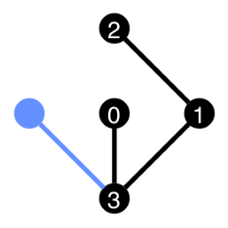

In [4]:
plot_circuit_layout(qca_trans, backend)

In [6]:
backend.configuration().coupling_map

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]

In [9]:
backend.name

'aer_simulator_from(fake_vigo)'

In [21]:
import math

qc_a = QuantumCircuit(1, 1)
# qc_a.h(0)
qc_a.z(0)
# qc_a.rz(math.pi/2, 1)
qc_a.measure([0], [0])

optimization_level = 1
backend = qiskit_aer.AerSimulator.from_backend(FakeVigo())
pm2 = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)

qca_trans = pm2.run(qc_a)

job = backend.run(qca_trans)

In [22]:
job.result().get_counts()

{'1': 529, '0': 495}